In [61]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Question 1

In [62]:

A = 106
C = 1283
M = 6075
I1 = 1

N = 1000

# Generate the sequence of random numbers Ij
def generate_random_numbers(N):
    I = np.zeros(N + 1)

    I[1] = I1
    for i in range(2, N + 1):
        I[i] = (A * I[i-1] + C) % M
    
    return I


# a) Plot Ij vs j for N = 1000

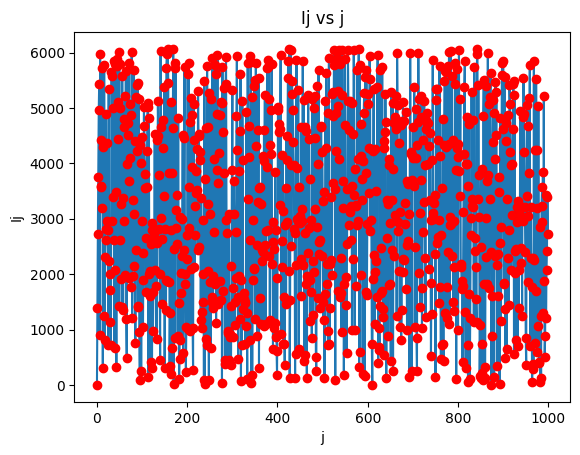

In [63]:

# plot Ij vs j with the points on red circles
I = generate_random_numbers(N)
I = I[1:]
plt.plot(I)
plt.plot(I, 'ro')
plt.xlabel('j')
plt.ylabel('Ij')
plt.title('Ij vs j')
plt.show()


# b) Plot Ij+1 vs Ij for N = 1000.

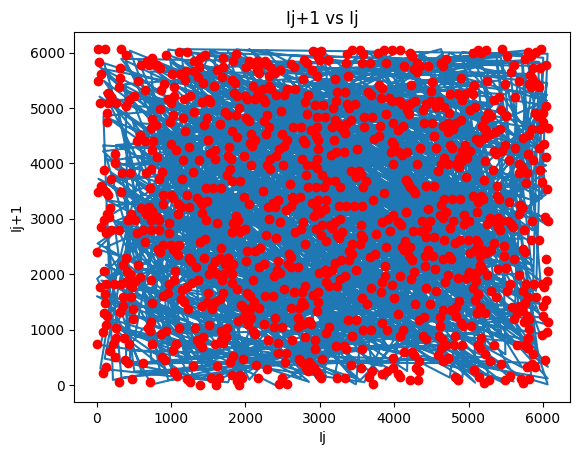

In [64]:
# plot Ij+1 vs Ij with the points on red circles
plt.plot(I[1:-2], I[2:-1])
plt.plot(I[1:], I[:-1], 'ro')
plt.xlabel('Ij')
plt.ylabel('Ij+1')
plt.title('Ij+1 vs Ij')
plt.show()

## We see an uniform distribution of points in the plot. We deduce that there is no correlation between Ij+1 and Ij. This implies that the pseudo-random variables generated are truly random.

# c) Plot the expectation value E(Ij) as a function of N. N = [1, 10, 50, 100, 200, 300,…., 1800, 1900, 2000].

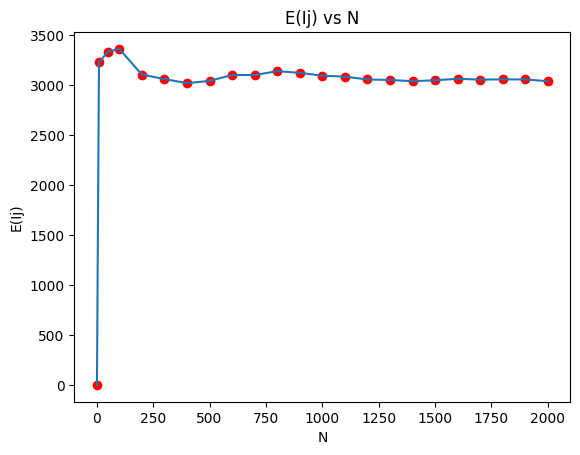

In [65]:
# Plot the expectation value E(Ij) as a function of N. N = [1, 10, 50, 100, 200, 300, …., 1800, 1900, 2000].
N = np.array([1, 10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000])
E = np.zeros(len(N))

for i in range(len(N)):
    I = generate_random_numbers(N[i])
    I = I[1:]
    E[i] = np.mean(I)

plt.plot(N, E, 'ro')
plt.plot(N, E)
plt.xlabel('N')
plt.ylabel('E(Ij)')
plt.title('E(Ij) vs N')
plt.show()

# Question 2


# a. Find the integration value using N = 100000 for the function e^cos x in the range [-3, 3].

In [66]:
def integrate(N):
    x = generate_random_numbers(N)
    x = x[1:]
    # scale x
    max_x = np.max(x)
    x = (x - 1) / (max_x - 1)
    x = -3 + 6 * x

    y = np.array([np.exp(np.cos(x[i])) for i in range(len(x))])
    I = 6 * np.mean(y)
    return I

I = integrate(100000)

print("The integral is: ", I)

The integral is:  7.849703478019051


# b. Plot the integration value as a function of N in the range [1, 100000] with a gap of 1000, i.e, N = 1, 1000, 2000, … 100000.

/tmp/ipykernel_10046/2692679267.py:6: RuntimeWarning: invalid value encountered in divide
  x = (x - 1) / (max_x - 1)


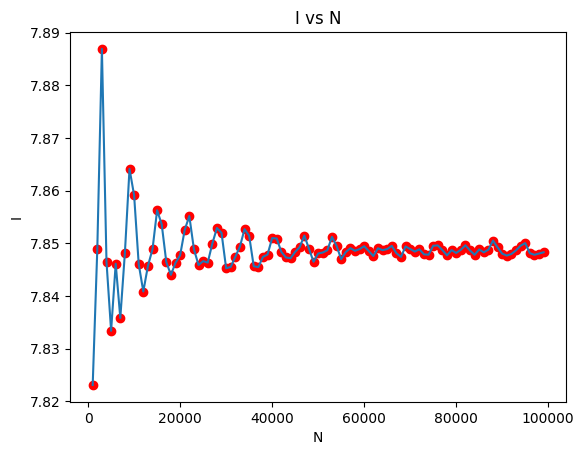

In [67]:
N = np.arange(1, 100001, 1000)
I = np.array([integrate(n) for n in N])

plt.plot(N, I, 'ro')
plt.plot(N, I)
plt.xlabel('N')
plt.ylabel('I')
plt.title('I vs N')
plt.show()



# Question 3

# a) Plot the probability that the person returns back to the origin after N timesteps for different values of N in the range of 1 to 100.

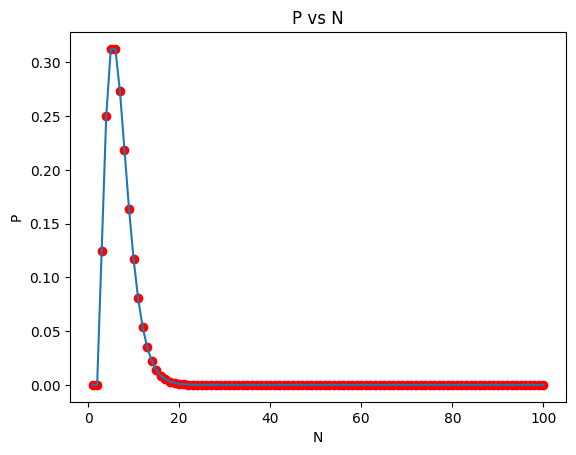

In [68]:
N = np.arange(1, 101, 1)
def PMF(n, N):
    return (math.factorial(N) * 0.5**N / (math.factorial(N-n)* math.factorial(n))) if N-n >= 0 else 0

P = np.array([PMF(3, n) for n in N])

plt.plot(N, P, 'ro')
plt.plot(N, P)
plt.xlabel('N')
plt.ylabel('P')
plt.title('P vs N')
plt.show()



# Plot the probability that they meet again after N timesteps for different values of N in the range of 1 to 100.

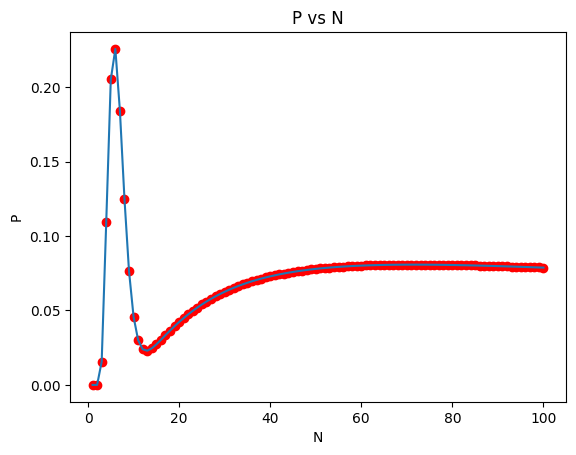

In [69]:
N = np.arange(1, 101, 1)
P = np.zeros(len(N))
for n in N:
    for na in range(-n, n+1):
        for nb in range(-n, n+1):
            if na - nb == 6:
                P[n-1] += PMF(abs(na), n) * PMF(abs(nb), n)

plt.plot(N, P, 'ro')
plt.plot(N, P)
plt.xlabel('N')
plt.ylabel('P')
plt.title('P vs N')
plt.show()


# Plot the mean displacement for a drunk person after N steps for different values of N in the range of 1 to 100.

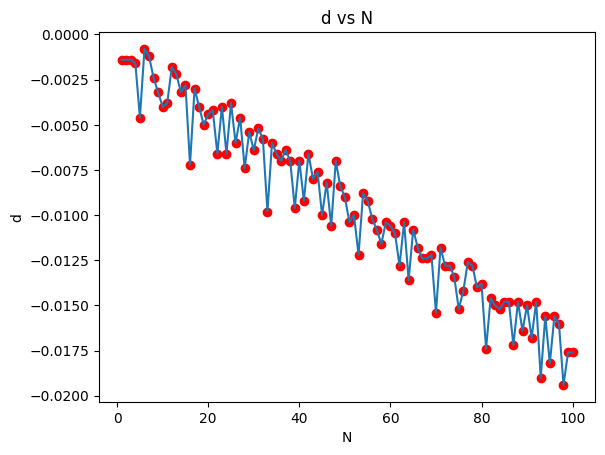

In [70]:
N = np.arange(1, 101, 1)
d = np.zeros(len(N))

for n in N:
    random_numbers = generate_random_numbers(n * 10000)
    random_numbers = random_numbers[1:]
    max_num = np.max(random_numbers)
    random_numbers = (random_numbers - 1) / (max_num - 1)
    random_numbers  = random_numbers > 0.5
    steps = np.array([1 if i else -1 for i in random_numbers])
    d[n - 1] = np.sum(steps)
    d[n-1] /= 10000

plt.plot(N, d, 'ro')
plt.plot(N, d)
plt.xlabel('N')
plt.ylabel('d')
plt.title('d vs N')
plt.show()
